In [1]:
import torch_imreg.imreg as imreg
from skimage import data
import matplotlib.pyplot as plt
import torch
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_squared_error

/opt/homebrew/anaconda3/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


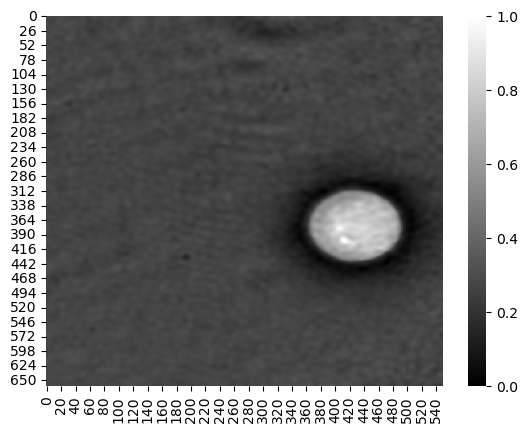

In [71]:
# Load cell image
cell = data.cell()
cell = torch.tensor(cell, dtype=torch.float32)
#normalize
cell = (cell - cell.min()) / (cell.max() - cell.min())
sns.heatmap(cell, cmap='gray');

In [72]:
#rotate image theta radians
def rotate_image(image, theta):
    import cv2
    rows, cols = image.shape
    center = (rows // 2, cols // 2)
    rotation_matrix = cv2.getRotationMatrix2D(center, theta, 1)
    rotated_image = cv2.warpAffine(image, rotation_matrix, (cols, rows))
    return rotated_image

#translate image x, y pixels
def translate_image(image, x, y):
    import cv2
    rows, cols = image.shape
    translation_matrix = np.float32([[1, 0, x], [0, 1, y]])
    translated_image = cv2.warpAffine(image, translation_matrix, (cols, rows))
    return translated_image

cell_rot = torch.tensor(rotate_image(cell.numpy(), np.pi))
cell_rot = torch.tensor(translate_image(cell_rot.numpy(), 0.4, 0.0))

In [73]:
#display image and reference image
def display(transformed, ref):
    fig, ax = plt.subplots(1,4, figsize=(13,10))
    ax[0].imshow(ref, cmap='gray')
    ax[0].set_title("Reference Image")
    ax[1].imshow(transformed, cmap='coolwarm')
    ax[1].set_title("Moved Image")
    ax[2].imshow(ref, cmap='gray')
    ax[2].imshow(transformed, cmap='coolwarm', alpha=0.5)
    ax[2].set_title("Overlayed Image")
    #display the difference between the two images
    im = ax[3].imshow(ref-transformed, cmap='bwr')
    ax[3].set_title(f"Difference = {mean_squared_error(transformed, ref):.5f}")
    

    fig.colorbar(im, ax=ax[3], fraction=0.046, pad=0.04)
    #remove axis
    for i in range(4):
        ax[i].axis('off')
    plt.show()

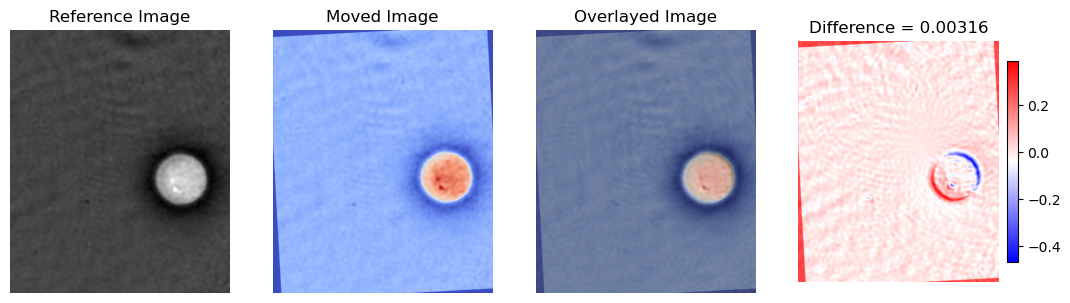

In [74]:
display(cell_rot, cell)

In [75]:
registered_cell, theta = imreg.imregIB(cell, 
        cell_rot, 
        loss_fn=torch.nn.functional.mse_loss, 
        optimizer='sgd', 
        optimizer_kwargs={'lr':0.2, 'momentum':0.4}, 
        n_iter=200, 
        return_transform=True, 
        verbose=True)


/opt/homebrew/anaconda3/lib/python3.10/site-packages/torch/nn/functional.py:4277: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/torch/nn/functional.py:4215: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(


Iteration: 0, Loss: 0.00316
Iteration: 1, Loss: 0.00204
Iteration: 2, Loss: 0.00145
Iteration: 3, Loss: 0.00096
Iteration: 4, Loss: 0.00069
Iteration: 5, Loss: 0.00057
Iteration: 6, Loss: 0.00050
Iteration: 7, Loss: 0.00044
Iteration: 8, Loss: 0.00039
Iteration: 9, Loss: 0.00034
Iteration: 10, Loss: 0.00030
Iteration: 11, Loss: 0.00026
Iteration: 12, Loss: 0.00023
Iteration: 13, Loss: 0.00021
Iteration: 14, Loss: 0.00019
Iteration: 15, Loss: 0.00017
Iteration: 16, Loss: 0.00015
Iteration: 17, Loss: 0.00013
Iteration: 18, Loss: 0.00012
Iteration: 19, Loss: 0.00011
Iteration: 20, Loss: 0.00010
Iteration: 21, Loss: 0.00009
Iteration: 22, Loss: 0.00008
Iteration: 23, Loss: 0.00008
Iteration: 24, Loss: 0.00007
Iteration: 25, Loss: 0.00007
Iteration: 26, Loss: 0.00007
Iteration: 27, Loss: 0.00007
Iteration: 28, Loss: 0.00007
Iteration: 29, Loss: 0.00007
Iteration: 30, Loss: 0.00007
Iteration: 31, Loss: 0.00007
Iteration: 32, Loss: 0.00007
Iteration: 33, Loss: 0.00007
Iteration: 34, Loss: 0.0

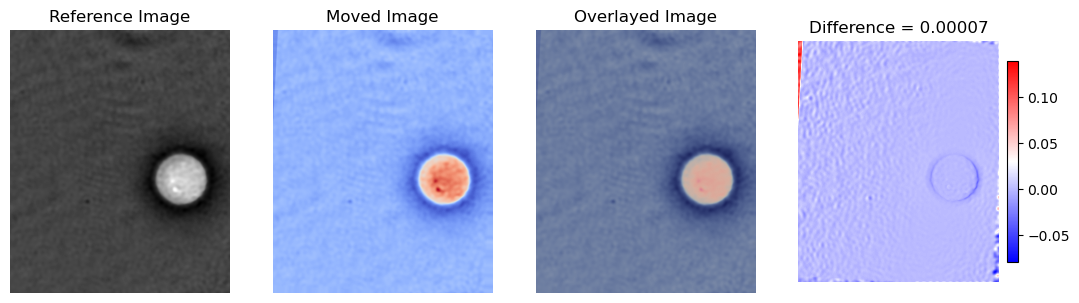

In [76]:
display(registered_cell, cell)

In [77]:
#The transformation matrix
theta

tensor([[ 0.9930,  0.0642,  0.0156],
        [-0.0455,  0.9975,  0.0090]], requires_grad=True)